# Regularization Techniques

*COSCI 223: Machine Learning 3*

In [59]:
import zipfile
with zipfile.ZipFile("data/cats_rabbits.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import datetime
from torchvision import transforms

In [2]:
torch.cuda.is_available()

True

# Dataset Preparation: Custom Datasets

You are now already familiar with data loading, specifically of datasets that are currently available in `torchvision`. But what if you require the use of custom datasets? In this section, we will first go through how to load custom datasets.

## Copying images to training, validation and test directories

The following copies the photos in the `cats_rabbits.zip` dataset into usable `train`, `validation`, and `test` sets using the `create_dataset` function. This is a shortened version of the code in Chollet's Deep Learning with Python.

In [3]:
import os, shutil

# this function can be used to copy images to train, validation, and test dirs
def create_dataset(src, dst, range_, class_):
    """Copy images of class class_ within range_ from src to dst.
    
    Parameters
    ----------
    src : str
        source directory
    dst : str
        destination directory
    range_ : tuple
        tuple of min and max image index to copy
    class_ : str
        image class (e.g., 'cat' or 'dog')
    """
    if os.path.exists(dst):
        # if existing, delete dir to reset
        shutil.rmtree(dst)
    os.makedirs(dst)
    fnames = [f'{class_}.{i}.jpg' for i in range(*range_)]
    for fname in fnames:
        src_file = os.path.join(src, fname)
        dst_file = os.path.join(dst, fname)
        shutil.copyfile(src_file, dst_file)

In [4]:
# looping through create_dataset for each class
classes = ['cat', 'rabbit']
for class_ in classes:
    src = 'data/cats_rabbits' # source file
    
    dst = f'data/cats_rabbits/train/{class_}' # train
    create_dataset(src+'/'+class_, dst, range_=(1, 501), class_=class_)

    dst = f'data/cats_rabbits/validation/{class_}' # val
    create_dataset(src+'/'+class_, dst, range_=(501, 701), class_=class_)
    
    dst = f'data/cats_rabbits/test/{class_}' # test
    create_dataset(src+'/'+class_, dst, range_=(701, 801), class_=class_)

In [5]:
train_cat_dir =  'data/cats_rabbits/train/cat'
train_rabbit_dir =  'data/cats_rabbits/train/rabbit'

validation_cat_dir = 'data/cats_rabbits/validation/cat'
validation_rabbit_dir = 'data/cats_rabbits/validation/rabbit'

test_cat_dir = 'data/cats_rabbits/test/cat'
test_rabbit_dir = 'data/cats_rabbits/test/rabbit'

**Checking the number of files in each directory**

In [6]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training rabbit images:', len(os.listdir(train_rabbit_dir)))

print('total validation cat images:', len(os.listdir(validation_cat_dir)))
print('total validation rabbit images:', len(os.listdir(validation_rabbit_dir)))

print('total test cat images:', len(os.listdir(test_cat_dir)))
print('total test rabbit images:', len(os.listdir(test_rabbit_dir)))

total training cat images: 500
total training rabbit images: 500
total validation cat images: 200
total validation rabbit images: 200
total test cat images: 100
total test rabbit images: 100


Indeed, we have 500 images for each training set for cats and rabbit, 200 images for each validation set, and 100 images for each test set. Now, let's visualize one image.

Random image path: data/cats_rabbits/train/cat/cat.376.jpg
Image class: cat
Image height: 300
Image width: 300


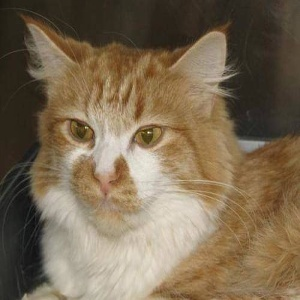

In [7]:
import random
from PIL import Image
from pathlib import Path
# set seed
random.seed(100) 

data_path = Path("data/")
image_path = data_path / "cats_rabbits"
# get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# get random image path
random_image_path = random.choice(image_path_list)

# get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# open image
img = Image.open(random_image_path)

# print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [9]:
# transform for our images
data_transform = transforms.Compose([
    transforms.Resize(size=(32, 32)),       # resize image to 32x32
    transforms.ToTensor()                   # converts the image into a torch tensor 
])

## Loading image data using `ImageFolder`

Now it's time to convert our image data into a Dataset that PyTorch can use. Here, we can use the class [torchvision.datasets.ImageFolder](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder).

In [10]:
# setup train and testing paths
train_dir = image_path / "train"
val_dir = image_path / "validation"
test_dir = image_path / "test"

train_dir, val_dir, test_dir

(PosixPath('data/cats_rabbits/train'),
 PosixPath('data/cats_rabbits/validation'),
 PosixPath('data/cats_rabbits/test'))

In [11]:
# use ImageFolder to create datasets


train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform)

val_data = datasets.ImageFolder(root=val_dir,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}")
print(f"Val data:\n{val_data}")
print(f"Test data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 1000
    Root location: data/cats_rabbits/train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Val data:
Dataset ImageFolder
    Number of datapoints: 400
    Root location: data/cats_rabbits/validation
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 200
    Root location: data/cats_rabbits/test
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


Pytorch was able to recognize our datasets. Let's inspect them.

In [12]:
# get class names as a list
class_names = train_data.classes
print(f"classes: {class_names}")

classes: ['cat', 'rabbit']


In [13]:
class_dict = train_data.class_to_idx
class_dict

{'cat': 0, 'rabbit': 1}

In [14]:
img, label = train_data[0][0], train_data[0][1]
print(f"image shape: {img.shape}")

image shape: torch.Size([3, 32, 32])


We have now verified that our images are in the form of a tensor with shape [3, 32, 32] and that our labels are in integer forms: 0 for cat and 1 for rabbit.

## Convert loaded datasets into dataloders

Our datasets can be made iterable by converting them into `DataLoaders` so that a model can gradually learn the relationships between the samples and the targets (features and labels). To do this, we'll use [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

In [15]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

We can now use our customized dataset.

# Modelling

## Model Building

For this part, we will use the same CNN architecture as before.

In [16]:
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)  # pooling layers included in the init
        
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        # two conv/tanh + pool layers
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))

        x = x.view(-1, 8 * 8 * 8)
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)

        return x

## Model Training with Validation

In [17]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f"Training on device {device}.")

Training on device cuda.


In [18]:
from torch import optim

model = Net().to(device=device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100
    
# Training with Validation Loop
def train_val_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader):   
    val_losses = []
    train_losses = []
    for epoch in range(n_epochs):
        
        # training loop
        running_train_loss = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()

        epoch_train_loss = running_train_loss / len(train_loader)

        train_losses.append(epoch_train_loss)

        # validation loop
        running_val_loss = 0.0
        for imgs, labels in val_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)

            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            running_val_loss += loss.item()

        epoch_val_loss = running_val_loss / len(val_loader)

        val_losses.append(epoch_val_loss)

        print(f'Epoch {epoch+1} \t\t Training Loss: {epoch_train_loss} \t\t Validation Loss: {epoch_val_loss}')
        
    return train_losses, val_losses

In [19]:
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10,5))
    plt.title("Training and Validation Loss")
    plt.plot(val_losses,label="val")
    plt.plot(train_losses,label="train")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend();
    plt.show();

In [20]:
train_losses, val_losses = train_val_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader)

Epoch 1 		 Training Loss: 0.6809748150408268 		 Validation Loss: 0.6428609320095607
Epoch 2 		 Training Loss: 0.6209624484181404 		 Validation Loss: 0.5188502499035427
Epoch 3 		 Training Loss: 0.5627888832241297 		 Validation Loss: 0.5367718807288578
Epoch 4 		 Training Loss: 0.5315466001629829 		 Validation Loss: 0.46657867091042654
Epoch 5 		 Training Loss: 0.498968917876482 		 Validation Loss: 0.4520626323563712
Epoch 6 		 Training Loss: 0.4788819160312414 		 Validation Loss: 0.44281718134880066
Epoch 7 		 Training Loss: 0.47417858242988586 		 Validation Loss: 0.432770128761019
Epoch 8 		 Training Loss: 0.4577281679958105 		 Validation Loss: 0.43182264055524555
Epoch 9 		 Training Loss: 0.4544239304959774 		 Validation Loss: 0.43875602739197866
Epoch 10 		 Training Loss: 0.44172991812229156 		 Validation Loss: 0.42627074888774324
Epoch 11 		 Training Loss: 0.4296108968555927 		 Validation Loss: 0.4358588627406529
Epoch 12 		 Training Loss: 0.4146415591239929 		 Validation Loss: 0.4

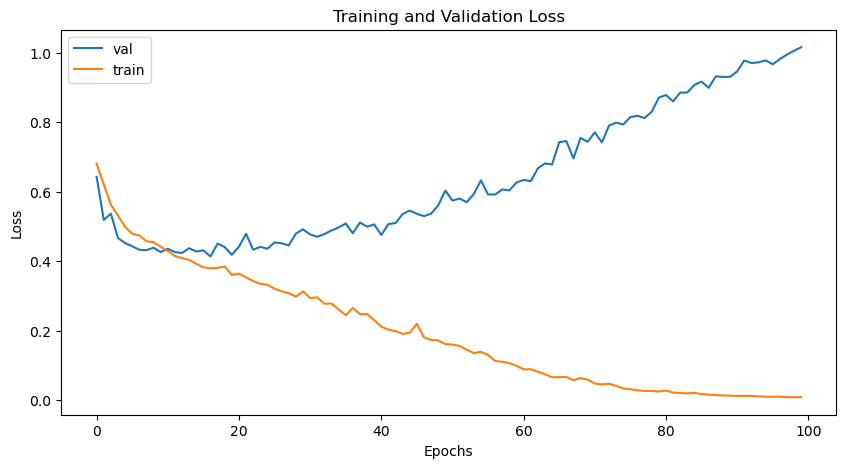

In [21]:
plot_losses(train_losses, val_losses)

<div class="alert alert-block alert-info"> <b>QUESTIONS:</b>     
    1. Based on the plot, what can you conclude about the performance of this model?     
    2. How can you improve the model performance? </div>

# Model Generalizability

*"Generalization refers to your model's ability to adapt properly to new, previously unseen data, drawn from the same distribution as the one used to create the model." (Generalization | Machine Learning | Google Developers, n.d.)*

While training, an **overfit model** has low loss, but it performs poorly at predicting new, unseen data, as seen in the plot above. How can we be sure that a model will accurately predict new data if it fits the present sample well?

## Improving Model Generalizability through Regularization

Many existing regularization strategies have been shown to be successful. Some of these approaches for reducing overfitting are already familiar to you, such as L2 (Ridge Regression) and L1 (Lasso Regression) regularization. Peng tackled a comprehensive and well-illustrated perspective on numerous regularization strategies in his book ***Regularization in Deep Learning***, including data, model, cost function, and optimization procedure. This is the first time regularization techniques have been classified. 

In the following section of this notebook, you will learn about some regularization techniques applied to deep learning models.


### Regularization via Data: Data Augmentation
The training dataset is the starting point for data augmentation techniques. This is done under the assumption that by augmenting the original dataset, more information can be recovered. These augmentations artificially increase the size of the training dataset by either **data warping** or **oversampling**. Data warping augmentations change existing images so that their labels remain intact. This includes geometric and color transformations, random erasure, adversarial training, and neural style transfer. On the other hand, synthetic examples are created and added to the training set via oversampling augmentations. This covers mixing images, feature space augmentations, and generative adversarial networks (GANs).

Data augmentation is done by making synthetic changes to individual samples, resulting in a new dataset with a larger effective size than the original. The goal is for the changes to produce a synthetic sample that is indicative of the same general class as the source sample but cannot be easily memorized alongside it. 

#### torchvision transforms
Many transformation functions are available in the [`torchivision.transforms`](https://pytorch.org/vision/0.9/transforms.html) library and can be used to augment training data. Let's try some of these functions.

In [22]:
# for plotting transforms
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(Path('data/cats_rabbits/cat') / 'cat.376.jpg')

def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

##### CenterCrop

It crops the given image at the center.

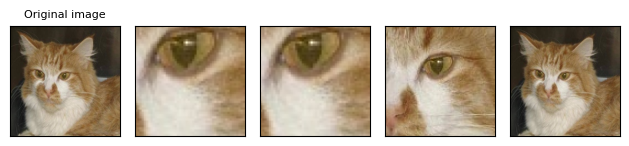

In [23]:
center_crops = [transforms.CenterCrop(size=size)(orig_img) for size in (50, 50, 100, orig_img.size)]
plot(center_crops)

##### Pad

This transform fills image borders with some pixel values.

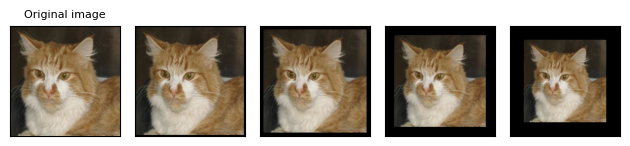

In [24]:
padded_imgs = [transforms.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

##### Resize

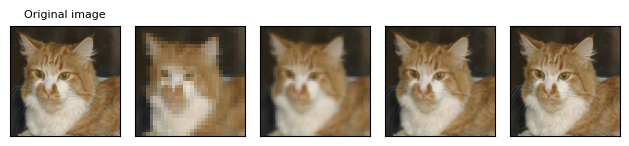

In [25]:
resized_imgs = [transforms.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs)

##### Random Transforms
The transforms listed below are all random, which means that the same transfomer instance will yield a new result each time it transforms an image.

**1. ColorJitter**

It randomly transforms the brightness, contrast, saturation, and hue of an image.

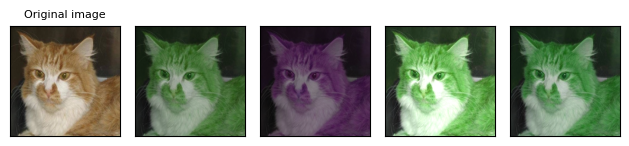

In [61]:
jitter = transforms.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

**2. GaussianBlur**

It performs gaussian blur transform on an image.

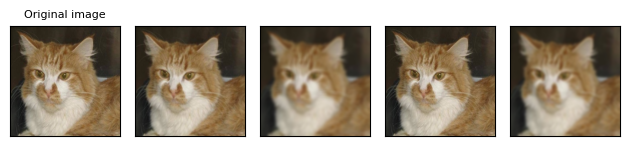

In [64]:
blurrer = transforms.GaussianBlur(kernel_size=(11, 11), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

**3. RandomPerspective**

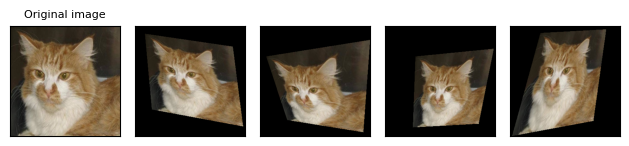

In [65]:
perspective_transformer = transforms.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

**4. RandomInvert**

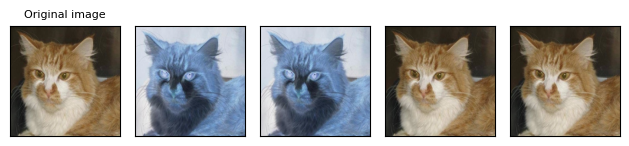

In [67]:
inverter = transforms.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs)

**5. RandomEqualize**

It randomly equalizes the histogram of the given image.

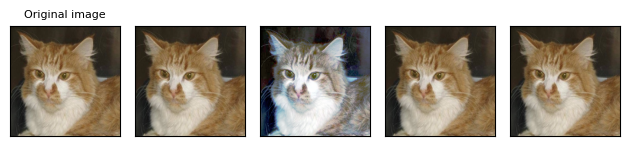

In [69]:
equalizer = transforms.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

**Other Random Transforms:**

* RandomRotation
* RandomAffine
* ElasticTransform
* RandomCrop
* RandomResizedCrop
* RandomPosterize
* RandomSolarize
* RandomAdjustSharpness
* RandomAutoContrast


##### RandAugment

It automatically augments the data.

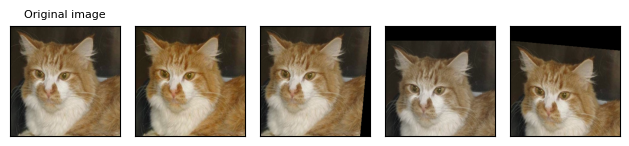

In [73]:
augmenter = transforms.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

##### Randomly-Applied Transforms
Some transforms are applied at random with a probability `p`. That is, even while using the same transformer instance, the modified image may be identical to the original.

**1. RandomHorizontalFlip**

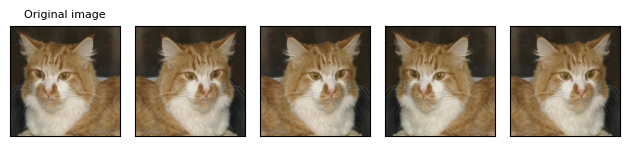

In [32]:
hflipper = transforms.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

**2. RandomVerticalFlip**

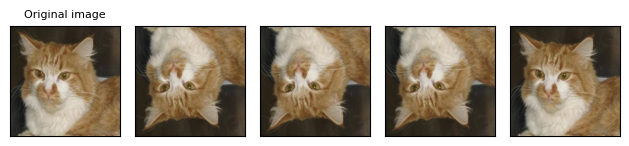

In [74]:
vflipper = transforms.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

**3. RandomApply**

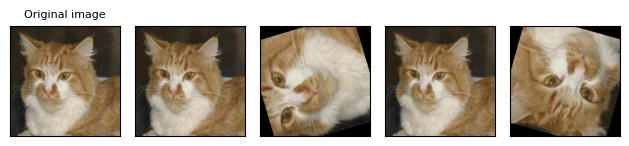

In [75]:
from torchvision import datasets, transforms
trans_ = [transforms.RandomCrop(size=(200, 200)),
          transforms.RandomRotation(degrees=(0, 180))]
applier = transforms.RandomApply(transforms=trans_, p=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs)

#### Data Augmentation in Action

In [35]:
# transform for the train set - data augmentation on the train set
train_transform = transforms.Compose([
    transforms.Resize(size=(32, 32)),                   # resize image to 32x32
    transforms.RandomHorizontalFlip(p=0.6),             # random horizontal flip
    transforms.ColorJitter(hue=.05, saturation=.05),    # 
    transforms.ToTensor()                               # converts the image into a torch tensor 
])

# transform for our validation and test set
val_transform = transforms.Compose([
    transforms.Resize(size=(32, 32)),                   # resize image to 32x32
    transforms.ToTensor()                               # converts the image into a torch tensor 
])

In [36]:
# using ImageFolder to create datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_transform)

val_data = datasets.ImageFolder(root=val_dir,
                                  transform=val_transform)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=val_transform)

# converting to DataLoader
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

### Regularization via Model: Dropout

**Dropout** decreases overfitting by avoiding a layer from being overly reliant on some inputs, which are typically biased due to appearance order or duplicity. *The key idea is to randomly drop units (along with their connections) from the neural network during training (as shown in the figure below). This prevents units from co-adapting too much.* Dropout was introduced in the paper [**Dropout: A Simple Way to Prevent Neural Networks from Overfitting**](https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer,) by Srivastava et al. (2014).

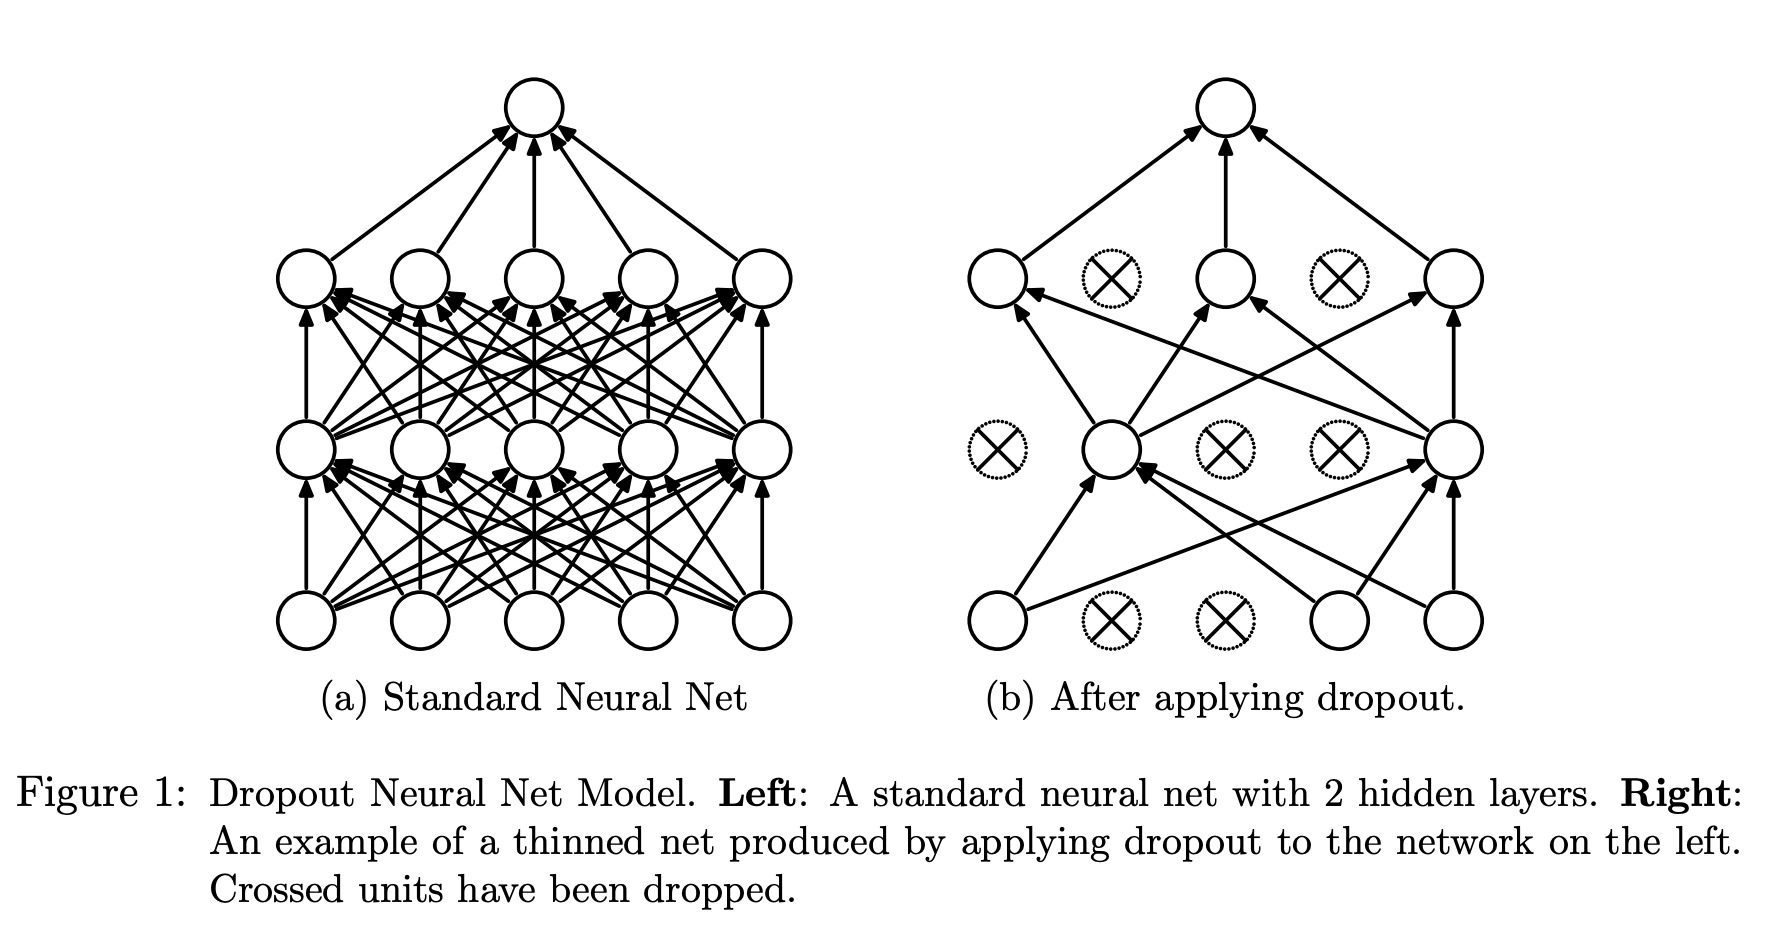

In [37]:
class WithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)  
        
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.4)
    
    def forward(self, x):
        # two conv/tanh + pool layers
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))

        x = x.view(-1, 8 * 8 * 8)
        x = self.dropout(x)             # dropout
        x = F.tanh(self.fc1(x))
        x = self.dropout(x)             # dropout
        x = self.fc2(x)

        return x

model_drop = WithDropout().to(device=device)
optimizer = optim.Adam(model_drop.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100


In [38]:
train_losses, val_losses = train_val_loop(n_epochs, optimizer, model_drop, loss_fn, train_loader, val_loader)

Epoch 1 		 Training Loss: 0.7157739847898483 		 Validation Loss: 0.5456508823803493
Epoch 2 		 Training Loss: 0.6025441996753216 		 Validation Loss: 0.5646557637623378
Epoch 3 		 Training Loss: 0.5860464535653591 		 Validation Loss: 0.5151688456535339
Epoch 4 		 Training Loss: 0.5618938691914082 		 Validation Loss: 0.48720424090112957
Epoch 5 		 Training Loss: 0.5547827407717705 		 Validation Loss: 0.48013995374952045
Epoch 6 		 Training Loss: 0.5214505400508642 		 Validation Loss: 0.4910881093570164
Epoch 7 		 Training Loss: 0.5146643053740263 		 Validation Loss: 0.46669202191489084
Epoch 8 		 Training Loss: 0.4929599743336439 		 Validation Loss: 0.6067539634449142
Epoch 9 		 Training Loss: 0.6147347558289766 		 Validation Loss: 0.5523233413696289
Epoch 10 		 Training Loss: 0.5409022718667984 		 Validation Loss: 0.4736939413206918
Epoch 11 		 Training Loss: 0.5121943149715662 		 Validation Loss: 0.46123391815594267
Epoch 12 		 Training Loss: 0.5114394277334213 		 Validation Loss: 0.49

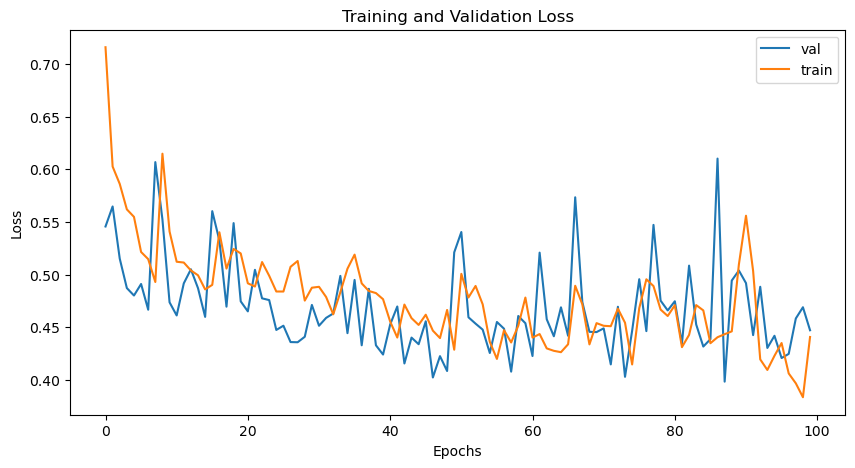

In [39]:
plot_losses(train_losses, val_losses)

Based on the plot above, we can see that the combination of data augmentation and dropout improved our model generalizability.

### Regularization via Optimization Procedure: Batch Normalization

The fact that the distribution of each layer's inputs changes during training as the parameters of the previous layers change (known as *internal covariance shift*) complicates deep neural network training. This slows down training by requiring lower learning rates and careful parameter setup. The usual way of handling this is by normalizing layer inputs.

In **batch normalization**, normalization is carried out in batches for each training mini-batch. This allows for higher learning rates to be used while being less concerned with initialization. This was introduced in the paper [**Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift**](https://arxiv.org/pdf/1502.03167.pdf) by Ioffe and Szegedy (2015).

In 2019, a group of researchers from MIT (Santurkar et al.) discovered a more fundamental effect of BatchNorm on the training process: it greatly smooths the optimization landscape. This smoothness causes the gradients' behavior to be more predictive and stable, allowing for faster training. Their findings are published in the the paper [**How Does Batch Normalization Help Optimization?**](https://proceedings.neurips.cc/paper_files/paper/2018/file/905056c1ac1dad141560467e0a99e1cf-Paper.pdf).

In [51]:
class WithBatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)  
        
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
        self.conv2_bn = nn.BatchNorm2d(8)
    
    def forward(self, x):
        # two conv/tanh + pool layers
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2_bn(self.conv2(x))))   # batch normalization

        x = x.view(-1, 8 * 8 * 8)
        x = F.tanh((self.fc1(x)))                                 
        x = self.fc2(x)

        return x

model_bn = WithBatchNorm().to(device=device)
optimizer = optim.Adam(model_bn.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100


In [52]:
train_losses, val_losses = train_val_loop(n_epochs, optimizer, model_bn, loss_fn, train_loader, val_loader)

Epoch 1 		 Training Loss: 0.6057583019137383 		 Validation Loss: 0.7079394374574933
Epoch 2 		 Training Loss: 0.5108541920781136 		 Validation Loss: 0.6639158640589032
Epoch 3 		 Training Loss: 0.48517629131674767 		 Validation Loss: 0.6942570464951652
Epoch 4 		 Training Loss: 0.47322532162070274 		 Validation Loss: 0.6380176714488438
Epoch 5 		 Training Loss: 0.46030406653881073 		 Validation Loss: 0.6258053353854588
Epoch 6 		 Training Loss: 0.42373361252248287 		 Validation Loss: 0.5931847776685443
Epoch 7 		 Training Loss: 0.4125546105206013 		 Validation Loss: 0.5782102729593005
Epoch 8 		 Training Loss: 0.399879090487957 		 Validation Loss: 0.5683434861046928
Epoch 9 		 Training Loss: 0.3967517074197531 		 Validation Loss: 0.49282582317079815
Epoch 10 		 Training Loss: 0.4021363686770201 		 Validation Loss: 0.6097530467169625
Epoch 11 		 Training Loss: 0.39378139190375805 		 Validation Loss: 0.4963440256459372
Epoch 12 		 Training Loss: 0.37752188742160797 		 Validation Loss: 0.

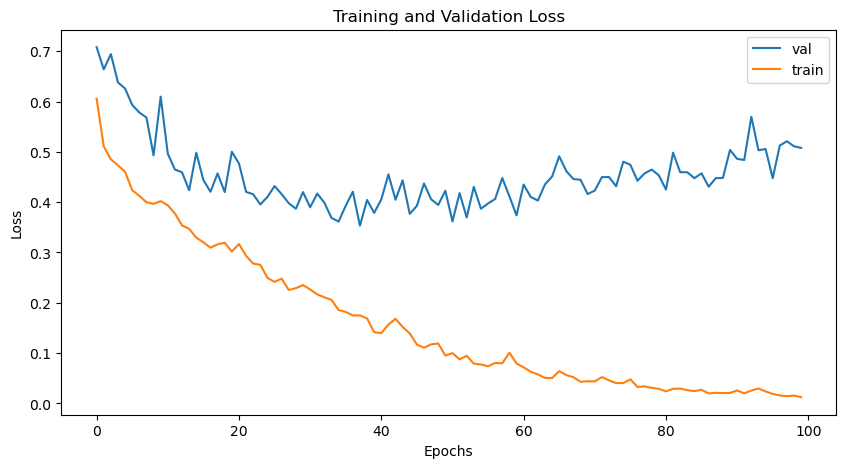

In [53]:
plot_losses(train_losses, val_losses)

In [55]:
class WithDropBatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)  
        
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.4)
        
        self.conv2_bn = nn.BatchNorm2d(8)
    
    def forward(self, x):
        # two conv/tanh + pool layers
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2_bn(self.conv2(x))))   # batch normalization

        x = x.view(-1, 8 * 8 * 8)
        x = self.dropout(x) 
        x = F.tanh((self.fc1(x)))                
        x = self.dropout(x) 
        x = self.fc2(x)

        return x

model_drop_bn = WithDropBatchNorm().to(device=device)
optimizer = optim.Adam(model_drop_bn.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100


In [56]:
train_losses, val_losses = train_val_loop(n_epochs, optimizer, model_drop_bn, loss_fn, train_loader, val_loader)

Epoch 1 		 Training Loss: 0.6393650472164154 		 Validation Loss: 0.6595672879900251
Epoch 2 		 Training Loss: 0.5481686051934958 		 Validation Loss: 0.706594101020268
Epoch 3 		 Training Loss: 0.507043581455946 		 Validation Loss: 0.6966702597481864
Epoch 4 		 Training Loss: 0.5134194828569889 		 Validation Loss: 0.7234520401273455
Epoch 5 		 Training Loss: 0.5072280447930098 		 Validation Loss: 0.6712355613708496
Epoch 6 		 Training Loss: 0.49525333382189274 		 Validation Loss: 0.6843292202268328
Epoch 7 		 Training Loss: 0.4774404037743807 		 Validation Loss: 0.6753739714622498
Epoch 8 		 Training Loss: 0.49210237339138985 		 Validation Loss: 0.6377470663615635
Epoch 9 		 Training Loss: 0.4723953641951084 		 Validation Loss: 0.6291204690933228
Epoch 10 		 Training Loss: 0.4647825751453638 		 Validation Loss: 0.6707039219992501
Epoch 11 		 Training Loss: 0.4765727426856756 		 Validation Loss: 0.6322705107075828
Epoch 12 		 Training Loss: 0.4574813228100538 		 Validation Loss: 0.610744

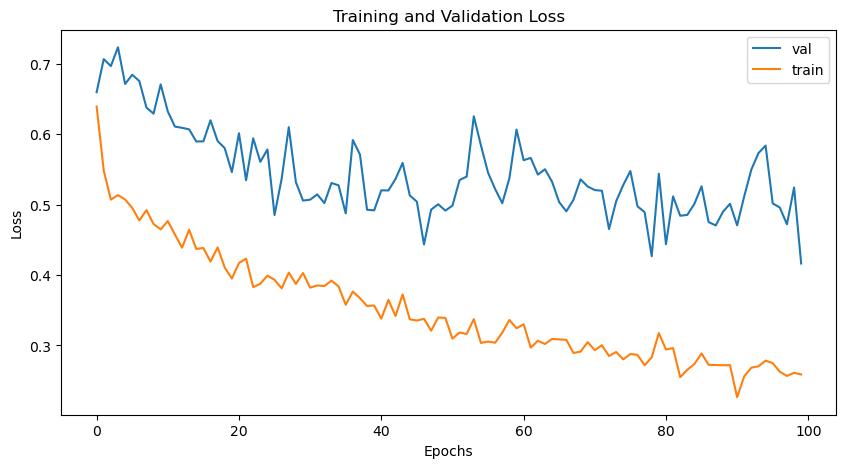

In [57]:
plot_losses(train_losses, val_losses)

# References

* *Generalization | Machine Learning | Google Developers*. (n.d.). Google Developers. https://developers.google.com/machine-learning/crash-course/generalization/video-lecture
* Ioffe, S., & Szegedy, C. (2015, June). Batch normalization: Accelerating deep network training by reducing internal covariate shift. In *International conference on machine learning* (pp. 448-456). pmlr.
* Peng, L. (2023, June 27). *Regularization in Deep Learning*. Manning.
* Pointer, I. (2019, November 4). *Programming Pytorch for Deep Learning: Creating and Deploying Deep Learning Applications*. O’Reilly Media, Inc.
* Santurkar, S., Tsipras, D., Ilyas, A., & Madry, A. (2018). How does batch normalization help optimization?. *Advances in neural information processing systems*, 31.
* Shorten, C., & Khoshgoftaar, T. M. (2019). A survey on image data augmentation for deep learning. *Journal of big data*, 6(1), 1-48.
* Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: a simple way to prevent neural networks from overfitting. *The journal of machine learning research*, 15(1), 1929-1958.
